# Exploring Meta-T Tetris data from Lindstedt and Gray (2015; 2019)
-------

### Notes on data 

- Download @ https://osf.io/78ebg/
- Three files:
    - "eps" describes the games of 241 participants at the episodic level (behavioural data and scores at each zoid)
    - "gms" provides summary stats (e.g., score, zoid sequence) for each game played in "eps"
    - "quals" includes episodic and summary data for tournament qualifier games played by 44 participants
- All variables described in 2017 paper by Sibert, Lindstedt, and Gray; doi number 10.1111/tops.12225
    - 85 columns in "eps"
    - 15 columns in "gms"
    - 89 columns in "quals"

Import libraries

In [1]:
import os
import sys
import socket

from modules import *

# initialise selected plotting parameters
sns_styleset()

Import data

In [2]:
def load_data(data_path='data'):
    
    eps = pd.read_csv(os.path.join(data_path, 'eps_15.tsv'), header=0, sep='\t', low_memory=False)
    gms = pd.read_csv(os.path.join(data_path, 'gms_15.tsv'), header=0, sep='\t', low_memory=False)
    quals = pd.read_csv(os.path.join(data_path, 'quals_2017.tsv'), header=0, sep='\t', low_memory=False)
    
    return eps, gms, quals
    
eps, gms, quals = load_data()

### Overview of data sets

In [3]:
eps = eps.reset_index(drop=True) # for safety
eps.head()

,ts,event_type,SID,ECID,session,game_type,game_number,episode_number,level,score,lines_cleared,curr_zoid,next_zoid,danger_mode,rots,trans,path_length,min_rots,min_trans,min_path,min_rots_diff,min_trans_diff,min_path_diff,u_drops,s_drops,prop_u_drops,initial_lat,drop_lat,avg_lat,tetrises_game,tetrises_level,zoid_rot,zoid_col,zoid_row,all_diffs,all_ht,all_trans,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cleared,col_trans,column_9,cuml_cleared,cuml_eroded,cuml_wells,d_all_ht,d_max_ht,d_mean_ht,d_pits,deep_wells,eroded_cells,full_cells,jaggedness,landing_height,lumped_pits,matches,max_diffs,max_ht,max_ht_diff,max_well,mean_ht,mean_pit_depth,min_ht,min_ht_diff,move_score,nine_filled,pattern_div,pit_depth,pit_rows,pits,row_trans,tetris,tetris_progress,weighted_cells,wells,criterion,crit_game,study
0,78.497857,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,0,0,16,0,O,S,False,0,4,4,0,4,4,0,0,0,17,2,0.894737,724,2083,416.600000,0,0,0,0,2,-2,4,4,0,-2,0,0,0,0,0,0,0,0,2,0,0,0,0,4,2,0.4,0,0,0,4,2,0,0,4,0,2,1.6,0,0.4,0.0,0,0.4,0,0,2,0,0,0,2,0,0,6,0,6042,True,TS1
1,88.278321,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,1,0,24,0,S,O,False,1,7,8,1,3,4,0,4,4,8,10,0.444444,606,4671,505.545455,0,0,1,1,4,-2,9,10,2,-1,-3,0,0,0,0,0,0,0,4,0,0,0,3,5,2,0.5,1,2,0,8,6,1,1,2,2,4,3.1,2,0.9,2.0,0,0.9,0,0,4,2,1,1,6,0,0,18,2,6042,True,TS1
2,92.966827,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,2,0,38,0,O,J,False,0,10,10,0,4,4,0,6,6,15,4,0.789474,701,4061,369.181818,0,0,0,8,2,0,13,14,2,-1,-3,0,0,0,0,2,0,0,6,2,0,0,3,4,0,0.4,0,2,0,12,8,0,1,4,2,4,2.7,2,1.3,2.0,0,1.3,0,0,5,2,1,1,8,0,0,24,2,6042,True,TS1
3,99.371939,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,3,0,51,0,J,S,False,1,4,5,1,1,2,0,3,3,13,6,0.684211,902,2089,621.000000,0,0,1,2,3,0,16,14,2,-1,0,-3,0,0,0,2,0,0,6,2,0,0,3,3,0,0.3,-1,2,0,16,8,0,0,6,2,4,2.4,2,1.6,0.0,0,1.6,0,0,6,0,0,0,8,0,0,31,2,6042,True,TS1
4,106.997525,EP_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,4,0,58,0,S,O,False,3,3,6,1,3,4,2,0,2,8,8,0.500000,857,6591,820.888889,0,0,1,1,6,0,20,18,4,-1,-2,-3,0,0,0,2,0,0,6,2,0,0,10,4,2,0.4,0,4,0,20,12,3,0,3,4,6,4.0,4,2.0,0.0,0,2.0,0,0,6,0,0,0,12,0,0,51,4,6042,True,TS1


In [4]:
quals = quals.sort_values(by=['SID', 'session', 'game_number', 'episode_number']) # reorder rows by participant ID, game number, followed by zoid 
quals = quals.reset_index(drop=True)
quals.head()

,year,SID,ts,event_type,session,game_type,game_number,episode_number,level,score,lines_cleared,evt_data2,curr_zoid,next_zoid,danger_mode,rots,trans,path_length,min_rots,min_trans,min_path,min_rots_diff,min_trans_diff,min_path_diff,u_drops,s_drops,prop_u_drops,initial_lat,drop_lat,avg_lat,tetrises_game,tetrises_level,delaying,dropping,zoid_rot,zoid_col,zoid_row,all_diffs,all_ht,all_trans,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cleared,col_trans,column_9,cuml_cleared,cuml_eroded,cuml_wells,d_all_ht,d_max_ht,d_mean_ht,d_pits,deep_wells,eroded_cells,full_cells,jaggedness,landing_height,lumped_pits,matches,max_diffs,max_ht,max_ht_diff,max_well,mean_ht,mean_pit_depth,min_ht,min_ht_diff,move_score,nine_filled,pattern_div,pit_depth,pit_rows,pits,row_trans,tetris,tetris_progress,weighted_cells,wells,tnmt_rank,tnmt_seed,tnmt_note,HQS
0,2014,1,19.813191,EP_SUMM,2014-3-1_13-4-49,qualifier,1,0,0,17,0,NaN,O,Z,False,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,18.0,1.0,0.947368,395.0,799.0,324.500000,0.0,0.0,NaN,NaN,0.0,0.0,2.0,-2.0,4.0,4.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,4.0,0.0,2.0,1.6,0.0,0.4,0.0,0.0,0.4,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,NaN,NaN,NaN,4043.0
1,2014,1,22.561384,EP_SUMM,2014-3-1_13-4-49,qualifier,1,1,0,34,0,NaN,Z,T,False,0.0,6.0,6.0,0.0,4.0,4.0,0.0,2.0,2.0,18.0,1.0,0.947368,47.0,147.0,199.615385,0.0,0.0,NaN,NaN,0.0,7.0,2.0,-1.0,9.0,11.0,0.0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,-1.0,0.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,0.0,1.0,3.0,2.0,2.0,1.1,1.0,0.9,1.0,0.0,0.9,0.0,0.0,5.0,1.0,1.0,1.0,5.0,0.0,0.0,12.0,1.0,NaN,NaN,NaN,4043.0
2,2014,1,25.565171,EP_SUMM,2014-3-1_13-4-49,qualifier,1,2,0,53,0,NaN,T,I,False,2.0,3.0,5.0,2.0,2.0,4.0,0.0,1.0,1.0,19.0,1.0,0.950000,51.0,346.0,209.000000,0.0,0.0,NaN,NaN,2.0,5.0,2.0,-1.0,12.0,12.0,0.0,-2.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,6.0,1.0,2.0,0.8,1.0,1.2,0.0,0.0,1.2,0.0,0.0,6.0,0.0,0.0,0.0,5.0,0.0,0.0,17.0,1.0,NaN,NaN,NaN,4043.0
3,2014,1,27.965636,EP_SUMM,2014-3-1_13-4-49,qualifier,1,3,0,69,0,NaN,I,Z,False,1.0,4.0,5.0,1.0,4.0,5.0,0.0,0.0,0.0,17.0,1.0,0.944444,51.0,51.0,237.375000,0.0,0.0,NaN,NaN,1.0,9.0,5.0,3.0,16.0,14.0,0.0,-2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,7.0,1.0,0.0,6.0,3.0,5.0,3.4,0.0,1.6,0.0,0.0,1.6,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0,31.0,0.0,NaN,NaN,NaN,4043.0
4,2014,1,30.713786,EP_SUMM,2014-3-1_13-4-49,qualifier,1,4,0,85,0,NaN,Z,I,False,1.0,5.0,6.0,1.0,1.0,2.0,0.0,4.0,4.0,17.0,1.0,0.944444,246.0,246.0,234.700000,0.0,0.0,NaN,NaN,1.0,5.0,4.0,3.0,20.0,18.0,0.0,-2.0,0.0,0.0,3.0,1.0,-2.0,0.0,3.0,0.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,11.0,1.0,0.0,3.0,3.0,5.0,3.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,11.0,0.0,0.0,43.0,0.0,NaN,NaN,NaN,4043.0


In [5]:
gms.head()

,ts,event_type,SID,ECID,session,game_type,game_number,episode_number,level,score,lines_cleared,completed,game_duration,avg_ep_duration,zoid_sequence,criterion,crit_game,study
1,668.113751,GAME_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,1,113,3,4006,31,NaN,589.615894,5.217840,"[\O\,\S\,\O\,\J\,\S\,\O\,\J\,\T\,\L\,\T\,\L\,\...",6042,True,TS1
2,958.883883,GAME_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,2,58,0,677,7,NaN,280.504167,4.836279,"[\I\,\L\,\I\,\S\,\Z\,\T\,\O\,\T\,\S\,\L\,\I\,\...",6042,False,TS1
3,1829.488090,GAME_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,3,201,6,13565,68,NaN,849.775758,4.227740,"[\T\,\L\,\I\,\O\,\S\,\L\,\O\,\S\,\L\,\I\,\O\,\...",6042,True,TS1
4,2215.288369,GAME_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,4,73,1,1536,16,NaN,370.534740,5.075818,"[\T\,\I\,\Z\,\O\,\S\,\J\,\L\,\I\,\J\,\I\,\L\,\...",6042,False,TS1
5,2742.999405,GAME_SUMM,101,NIL,2013_6_6_12-23-50,pop_assessment,5,110,2,3453,29,NaN,512.036498,4.654877,"[\Z\,\I\,\O\,\I\,\S\,\I\,\J\,\I\,\T\,\Z\,\L\,\...",6042,True,TS1


### Dimensionality reduction of performance variables

Concentrating our efforts on the "eps" data set, we try to identify salient and independent aspects of performance in Tetris by collapsing our features via ML

In [217]:
# How many players do we have?
n = eps['SID'].nunique()
print(f'We have {n} participants in our "eps" data set')

We have 241 participants in our "eps" data set


Number of total games played

In [218]:
eps.groupby('SID')['game_number'].nunique().sum()

2146

Overview of number of episodes per game

In [219]:
eps.groupby(['SID', 'game_number'])['episode_number'].max().describe()

count    2146.000000
mean      125.265610
std        74.221249
min         0.000000
25%        69.000000
50%       107.000000
75%       172.750000
max       457.000000
Name: episode_number, dtype: float64

In [256]:
eps.groupby('SID')['game_number'].max().describe()

count    239.000000
mean       8.928870
std        3.303799
min        4.000000
25%        7.000000
50%        8.000000
75%       10.000000
max       33.000000
Name: game_number, dtype: float64

Overview of number of levels per game

In [220]:
eps.groupby(['SID', 'game_number'])['level'].max().describe()

count    2146.00000
mean        3.37931
std         2.96752
min         0.00000
25%         1.00000
50%         3.00000
75%         5.00000
max        17.00000
Name: level, dtype: float64

Overview of number of games per player

Drop players that don't get past the first level

In [221]:
never_past_0 = eps.groupby(['SID'])['level'].max()
never_past_0[never_past_0 == 0]

SID
3189       0
F2015_1    0
Name: level, dtype: int64

In [222]:
eps = eps.drop(eps[eps['SID'].isin(['3189', 'F2015_1'])].index)
eps = eps.reset_index(drop=True)

### Prepare dataframe for factor analysis - drop general and game summary outputs

In [224]:
short_eps = eps.drop(columns=summary_features+game_state_features)
short_eps.head()

,rots,trans,path_length,min_rots,min_trans,min_path,min_rots_diff,min_trans_diff,min_path_diff,u_drops,s_drops,prop_u_drops,initial_lat,drop_lat,avg_lat,all_diffs,all_ht,all_trans,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cleared,col_trans,column_9,cuml_cleared,cuml_eroded,cuml_wells,d_all_ht,d_max_ht,d_mean_ht,d_pits,deep_wells,eroded_cells,full_cells,jaggedness,landing_height,lumped_pits,matches,max_diffs,max_ht,max_ht_diff,max_well,mean_ht,mean_pit_depth,min_ht,min_ht_diff,move_score,nine_filled,pattern_div,pit_depth,pit_rows,pits,row_trans,tetris,tetris_progress,weighted_cells,wells
0,0,4,4,0,4,4,0,0,0,17,2,0.894737,724,2083,416.600000,-2,4,4,0,-2,0,0,0,0,0,0,0,0,2,0,0,0,0,4,2,0.4,0,0,0,4,2,0,0,4,0,2,1.6,0,0.4,0.0,0,0.4,0,0,2,0,0,0,2,0,0,6,0
1,1,7,8,1,3,4,0,4,4,8,10,0.444444,606,4671,505.545455,-2,9,10,2,-1,-3,0,0,0,0,0,0,0,4,0,0,0,3,5,2,0.5,1,2,0,8,6,1,1,2,2,4,3.1,2,0.9,2.0,0,0.9,0,0,4,2,1,1,6,0,0,18,2
2,0,10,10,0,4,4,0,6,6,15,4,0.789474,701,4061,369.181818,0,13,14,2,-1,-3,0,0,0,0,2,0,0,6,2,0,0,3,4,0,0.4,0,2,0,12,8,0,1,4,2,4,2.7,2,1.3,2.0,0,1.3,0,0,5,2,1,1,8,0,0,24,2
3,1,4,5,1,1,2,0,3,3,13,6,0.684211,902,2089,621.000000,0,16,14,2,-1,0,-3,0,0,0,2,0,0,6,2,0,0,3,3,0,0.3,-1,2,0,16,8,0,0,6,2,4,2.4,2,1.6,0.0,0,1.6,0,0,6,0,0,0,8,0,0,31,2
4,3,3,6,1,3,4,2,0,2,8,8,0.500000,857,6591,820.888889,0,20,18,4,-1,-2,-3,0,0,0,2,0,0,6,2,0,0,10,4,2,0.4,0,4,0,20,12,3,0,3,4,6,4.0,4,2.0,0.0,0,2.0,0,0,6,0,0,0,12,0,0,51,4


Bartlett's test for sphericity

In [225]:
chi, p = calculate_bartlett_sphericity(short_eps)
print(f'{chi} and {p}')

nan and nan


/home/ozvar/.local/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:118: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


Kaiser-Meyer-Olkin Test

In [226]:
kmo_all,kmo_model=calculate_kmo(short_eps)
print(kmo_model)

/home/ozvar/.local/lib/python3.9/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.7482270433975766


There are 6 factors with an eigenvalue above 1


/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


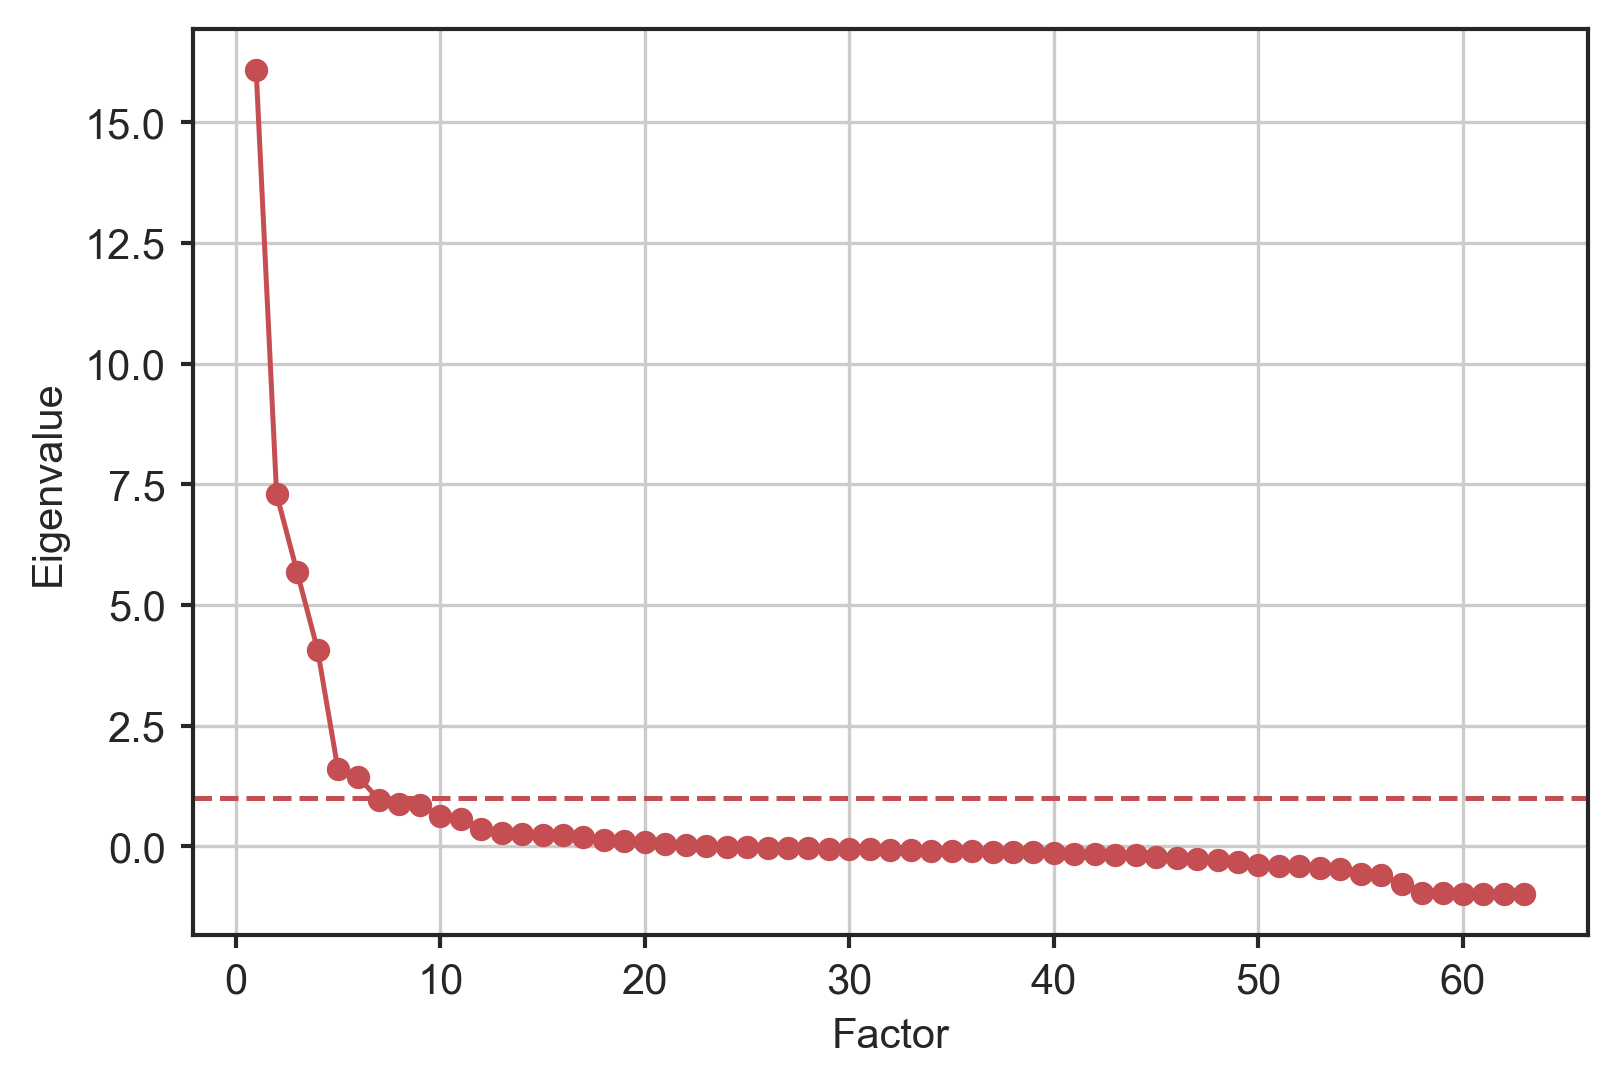

In [227]:
ev, loadings, fa = factor_analyse(short_eps)

ev_above_1 = [i for i in ev if i > 1]
print(f'There are {len(ev_above_1)} factors with an eigenvalue above 1')

scree_plot(ev, xlabel='Factor', ylabel='Eigenvalue')

In [228]:
ev, loadings, fa = factor_analyse(short_eps, 
                                  n_factors=6,
                                  rotation=None, 
                                  method='minres',
                                  cutoff=0.4, 
                                  display_loadings=False)

/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


In [229]:
ev, loadings, fa = factor_analyse(short_eps,
                                  n_factors=6, 
                                  rotation='varimax',
                                  method='minres',
                                  cutoff=0.4,
                                  display_loadings=True)

/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


,1,2,3,4,5,6
mean_ht,0.967198,,,,,
all_ht,0.967198,,,,,
pit_rows,0.961779,,,,,
all_trans,0.947117,,,,,
full_cells,0.938760,,,,,
weighted_cells,0.935875,,,,,
min_ht,0.931560,,,,,
col_trans,0.927730,,,,,
pit_depth,0.916898,,,,,
lumped_pits,0.915790,,,,,


## Factor analyse restricted feature set taken from Lindstedt and Gray (2019)

Generate 'response latency' feature as in Lindstedt and Gray: describes time taken to decide zoid placement, similar to drop_lat but meaningful even if zoid is not intentionally placed

In [230]:
# create episode duration variable
eps['ep_dur'] = eps.groupby('SID')['ts'].diff()
# if drop latency is 0, response latency is episode duration in milliseconds, otherwise it is the drop latency
eps['resp_lat'] = np.where(eps['drop_lat'] == 0, eps['ep_dur']*1000, eps['drop_lat'])
# replace nan values with drop latency for edge cases
eps['resp_lat'] = np.where(np.isnan(eps['resp_lat']), eps['drop_lat'], eps['resp_lat'])
# convert to int64
eps['resp_lat'] = eps['resp_lat'].astype('int')

Trim data set to selected features

In [232]:
short_eps = eps[lindstedt_2019_features+['resp_lat']]

Bartlett's test for sphericity

In [233]:
chi, p = calculate_bartlett_sphericity(short_eps)
print(f'{chi} and {p}')

12568278.917150669 and 0.0


Kaiser-Meyer-Olkin Test

In [234]:
kmo_all,kmo_model=calculate_kmo(short_eps)
print(kmo_model)

0.8196337554342402


In [235]:
ev, loadings, fa = factor_analyse(short_eps, 
                                  n_factors=6,
                                  rotation=None, 
                                  method='minres',
                                  cutoff=0.4)

/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


Check eigenvalues

There are 4 factors with an eigenvalue above 1


/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


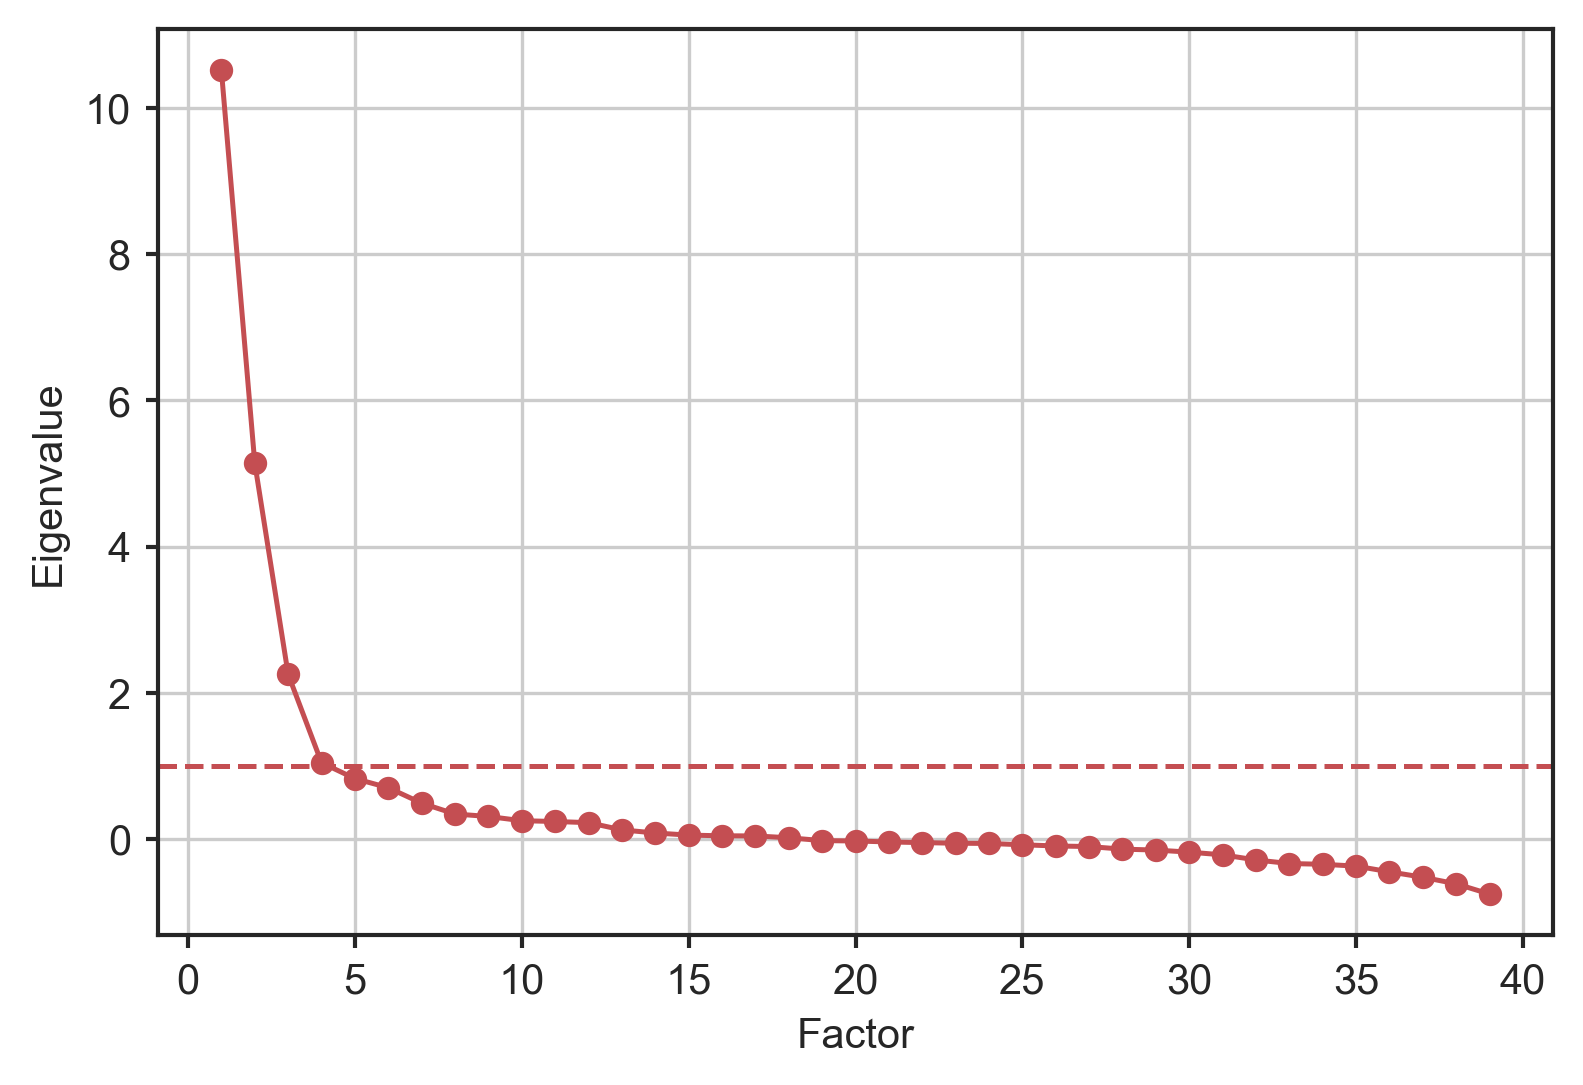

In [236]:
ev, loadings, fa = factor_analyse(short_eps)

ev_above_1 = [i for i in ev if i > 1]
print(f'There are {len(ev_above_1)} factors with an eigenvalue above 1')

scree_plot(ev, xlabel='Factor', ylabel='Eigenvalue')

In [237]:
ev, loadings, fa = factor_analyse(short_eps,
                                  n_factors=4, 
                                  rotation='varimax',
                                  method='minres',
                                  cutoff=0.4,
                                  display_loadings=True)

/home/ozvar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:931: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  warnings.warn("Passing attributes to check_is_fitted is deprecated"


,1,2,3,4
pit_rows,0.972568,,,
col_trans,0.944831,,,
pits,0.943674,,,
mean_ht,0.939857,,,
lumped_pits,0.938401,,,
pit_depth,0.936944,,,
min_ht,0.935294,,,
weighted_cells,0.912205,,,
landing_height,0.877721,,,
max_ht,0.865583,,,


### Same feature set, this time conduct PCA

In [238]:
# standardise all variables
scaled_eps = StandardScaler().fit_transform(short_eps)
scaled_eps = pd.DataFrame(scaled_eps, columns=short_eps.columns)

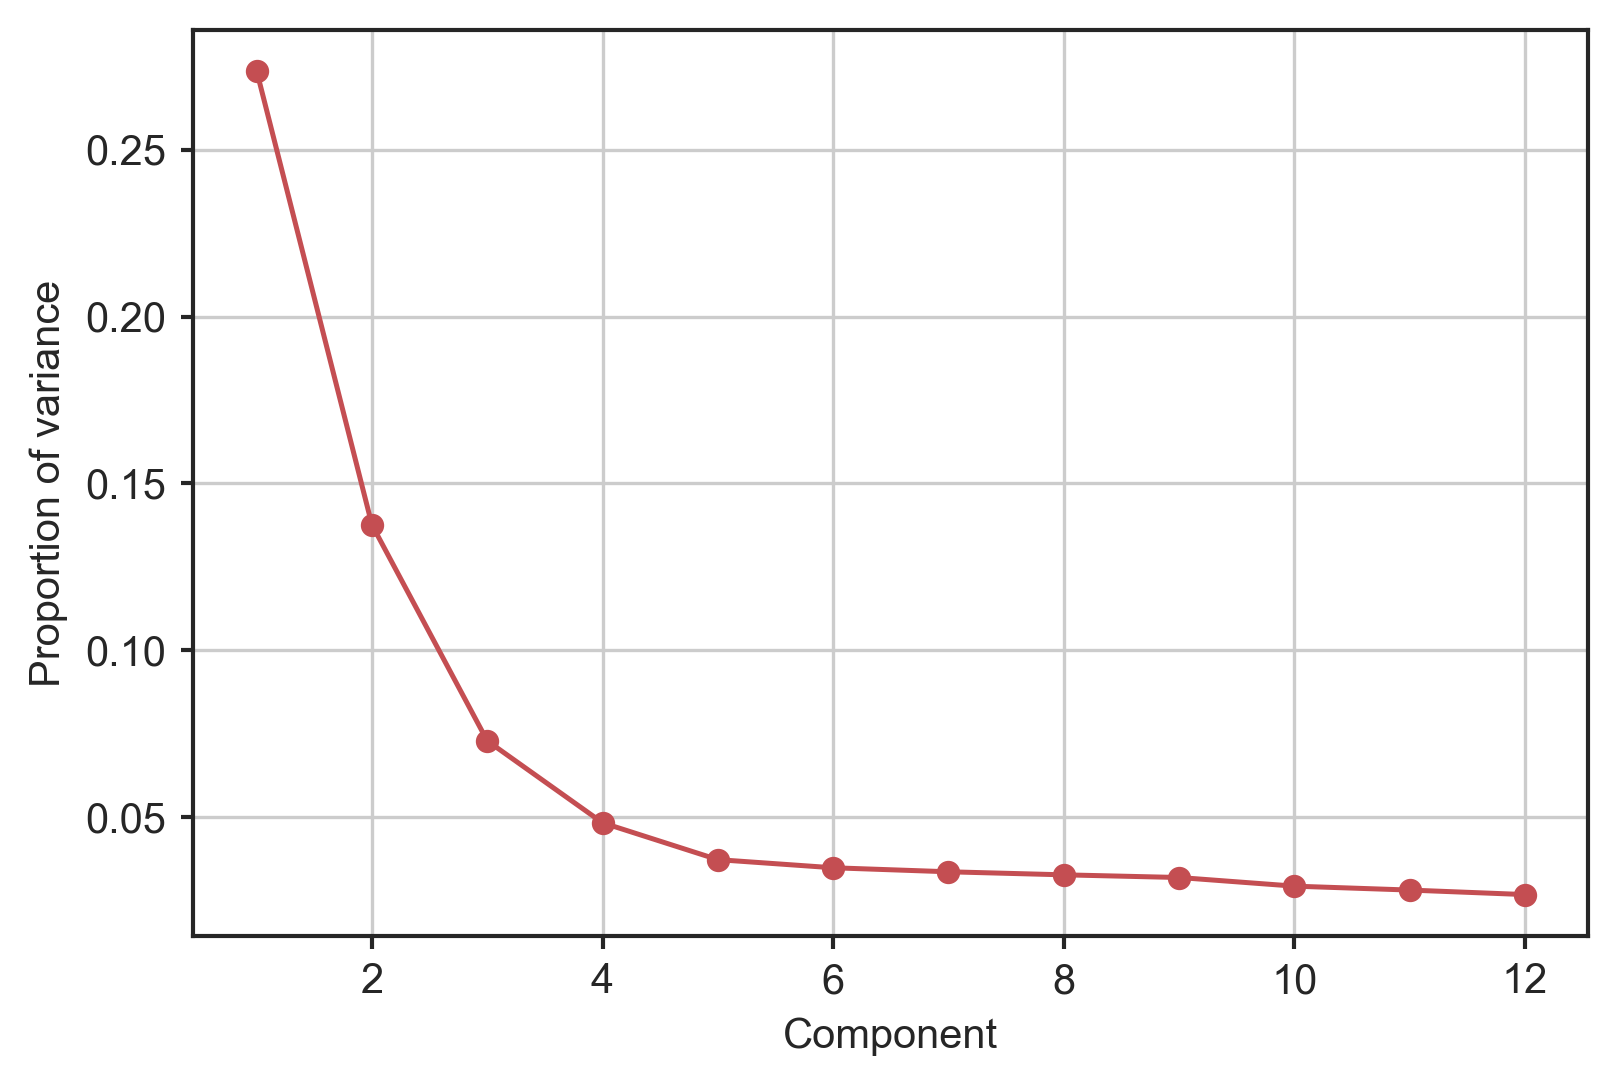

In [239]:
loadings, pca = princomp(scaled_eps, 
                         n_components=12, 
                         cutoff=0.2,
                         display_loadings=False)

scree_plot(pca.explained_variance_ratio_, xlabel='Component', ylabel='Proportion of variance', hline=False)

How much variance do the components explain individually and collectively?

In [240]:
explained = [round(i, 3) for i in pca.explained_variance_ratio_]
total = sum(explained)

print(f'Variance explained by each component: {explained}')
print(f'Total variance explained: {total}')

Variance explained by each component: [0.274, 0.138, 0.073, 0.048, 0.037, 0.035, 0.034, 0.033, 0.032, 0.029, 0.028, 0.027]
Total variance explained: 0.7880000000000003


In [241]:
loadings, pca = princomp(scaled_eps, 
                         n_components=4, 
                         cutoff=0.2,
                         display_loadings=True)

,1,2,3,4
mean_ht,0.295594,,,
weighted_cells,0.288888,,,
row_trans,0.288676,,,
max_ht,0.287219,,,
landing_height,0.284518,,,
pit_rows,0.278981,,,
pit_depth,0.273079,,,
pits,0.271259,,,
col_trans,0.271128,,,
lumped_pits,0.266674,,,


In [242]:
explained = [round(i, 3) for i in pca.explained_variance_ratio_]
total = sum(explained)

print(f'Variance explained by each component: {explained}')
print(f'Total variance explained: {total}')

Variance explained by each component: [0.274, 0.138, 0.073, 0.048]
Total variance explained: 0.533


### Factor extraction

Fit our components to our trimmed data set and provide sensible labels

In [243]:
comp_names = ['disarray', 'well_prep', 'action_inefficiency', 'dec_act_latency']
comps = pd.DataFrame(pca.fit_transform(scaled_eps), columns=comp_names)
comps.head()

,disarray,well_prep,action_inefficiency,dec_act_latency
0,-5.134157,-1.586969,-0.644153,1.666857
1,-3.560078,0.025134,2.061224,1.965641
2,-3.673725,-0.046883,1.538938,-0.126623
3,-3.694565,-0.079468,-0.008069,0.382824
4,-2.580161,1.950760,2.455355,2.720186


Export data

In [244]:
pca_eps = eps.join(comps)

file_path = os.path.join('data', 'pca_eps.csv')
pca_eps.to_csv(file_path, index=False)